<a href="https://colab.research.google.com/github/kavya2299/Deep-Learning/blob/master/MNIST_using_Keras_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using keras datasets

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
(train_images,train_labels), (test_images,test_labels)=mnist.load_data()

Defining the Architecture

In [0]:
from keras import models
from keras import layers
from keras import regularizers


network=models.Sequential()
network.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.00001),activation='relu',input_shape=(28*28,))) # tested on l2 reg parameter being 0.1,0.001,0.0001 and finally the best performance was on 0.00001 
network.add(layers.Dense(10,activation='softmax')) # softmax because tehy all add up to 1

Compilation

In [0]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Preprocessing 

In [0]:
train_images=train_images.reshape((60000,28*28)) #reshaping
train_images=train_images.astype('float32')/255 #normalizing 

test_images=test_images.reshape((10000,28*28)) 
test_images=test_images.astype('float32')/255


Categorical Encoding


In [0]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

#Training the network 1

In [0]:
#defining a validation set
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [0]:
model=network.fit(train_images,train_labels,epochs=5,batch_size=512,validation_data=(x_val,y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3993 - acc: 0.8896 - val_loss: 0.2532 - val_acc: 0.9291
Epoch 2/5
60000/60000 [==============================] - 1s 13us/step - loss: 0.1798 - acc: 0.9495 - val_loss: 0.1461 - val_acc: 0.9577
Epoch 3/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.1235 - acc: 0.9658 - val_loss: 0.1603 - val_acc: 0.9516
Epoch 4/5
60000/60000 [==============================] - 1s 13us/step - loss: 0.0948 - acc: 0.9753 - val_loss: 0.0779 - val_acc: 0.9805
Epoch 5/5
60000/60000 [==============================] - 1s 13us/step - loss: 0.0759 - acc: 0.9799 - val_loss: 0.0615 - val_acc: 0.9849


In the above, we have reached a good accuracy on training data.

Plotting the accuracy and loss curves of training and validation sets

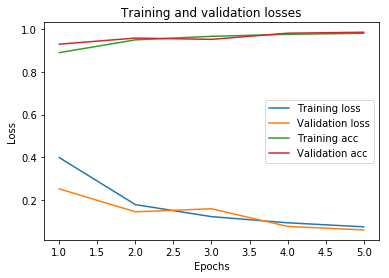

In [0]:
import matplotlib.pyplot as plt

#defining the variables, loss and val_loss
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1, len(loss) + 1)
acc=model.history['acc']
val_acc=model.history['val_acc']
epochs = range(1, len(loss) + 1)

#plotting curves
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.plot(epochs, acc,label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')

plt.title('Training and validation losses')

#labelling the axes
plt.xlabel('Epochs')
plt.ylabel('Loss')

#obtaining legend
plt.legend()
#display 
plt.show()

Accuracy of model

In [0]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

10000/10000 [==============================] - 1s 60us/step
test accuracy: 0.9792


The difference in the accuracies of both test and train datasets is attributed to the overfitting that is taking place. This is overcome by using l2 regularization. 

#Training the network 2 
(validation sets at random)

In [0]:
model=network.fit(train_images,train_labels,epochs=5,batch_size=512,validation_split=0.2,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 31us/step - loss: 0.4437 - acc: 0.8771 - val_loss: 0.2479 - val_acc: 0.9354
Epoch 2/5
48000/48000 [==============================] - 1s 13us/step - loss: 0.2068 - acc: 0.9421 - val_loss: 0.1781 - val_acc: 0.9502
Epoch 3/5
48000/48000 [==============================] - 1s 13us/step - loss: 0.1476 - acc: 0.9603 - val_loss: 0.1392 - val_acc: 0.9603
Epoch 4/5
48000/48000 [==============================] - 1s 13us/step - loss: 0.1127 - acc: 0.9696 - val_loss: 0.1153 - val_acc: 0.9693
Epoch 5/5
48000/48000 [==============================] - 1s 13us/step - loss: 0.0897 - acc: 0.9765 - val_loss: 0.1057 - val_acc: 0.9718


Plotting the train and validation losses

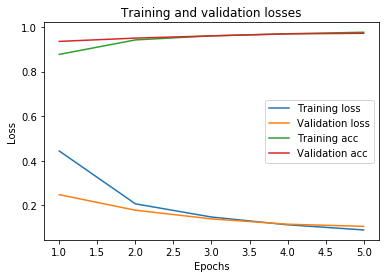

In [0]:
import matplotlib.pyplot as plt

#defining the variables, loss and val_loss
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1, len(loss) + 1)
acc=model.history['acc']
val_acc=model.history['val_acc']
epochs = range(1, len(loss) + 1)

#plotting curves
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.plot(epochs, acc,label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')

plt.title('Training and validation losses')

#labelling the axes
plt.xlabel('Epochs')
plt.ylabel('Loss')

#obtaining legend
plt.legend()
#display 
plt.show()

In [0]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

10000/10000 [==============================] - 1s 57us/step
test accuracy: 0.9724


In [0]:
model=network.fit(train_images,train_labels,epochs=5,batch_size=512)

Epoch 1/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0790 - acc: 0.9796
Epoch 2/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0643 - acc: 0.9838
Epoch 3/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0550 - acc: 0.9863
Epoch 4/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0465 - acc: 0.9894
Epoch 5/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0404 - acc: 0.9911


In [0]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

10000/10000 [==============================] - 1s 56us/step
test accuracy: 0.9816
